# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    print (city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe2f0be5b34fce0e6d7972e5e0605297&q=myeik
Processing Record 1 of Set 1 | myeik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe2f0be5b34fce0e6d7972e5e0605297&q=grytviken
Processing Record 2 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe2f0be5b34fce0e6d7972e5e0605297&q=adamstown
Processing Record 3 of Set 1 | adamstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe2f0be5b34fce0e6d7972e5e0605297&q=west+island
Processing Record 4 of Set 1 | west island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe2f0be5b34fce0e6d7972e5e0605297&q=yuzhno-kurilsk
Processing Record 5 of Set 1 | yuzhno-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fe2f0be5b34fce0e6d7972e5e0605297&q=camana
Processing Record 6 of Set 1 | camana
http://api.openw

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,myeik,12.4333,98.6000,90.16,54,78,1.05,MM,1682915155
1,grytviken,-54.2811,-36.5092,34.61,87,100,36.13,GS,1682914584
2,adamstown,-25.0660,-130.1015,77.54,86,90,14.14,PN,1682915155
3,west island,-12.1568,96.8225,84.18,79,40,18.41,CC,1682915156
4,yuzhno-kurilsk,44.0306,145.8556,48.74,82,75,2.42,RU,1682915156


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,myeik,12.4333,98.6000,90.16,54,78,1.05,MM,1682915155
1,grytviken,-54.2811,-36.5092,34.61,87,100,36.13,GS,1682914584
2,adamstown,-25.0660,-130.1015,77.54,86,90,14.14,PN,1682915155
3,west island,-12.1568,96.8225,84.18,79,40,18.41,CC,1682915156
4,yuzhno-kurilsk,44.0306,145.8556,48.74,82,75,2.42,RU,1682915156


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

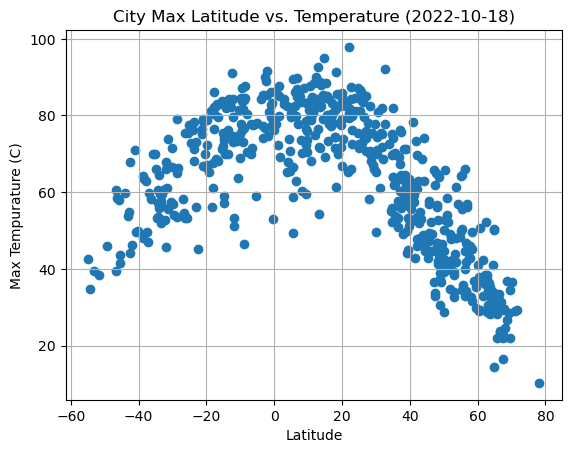

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df ["Lat"], city_data_df ["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Tempurature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

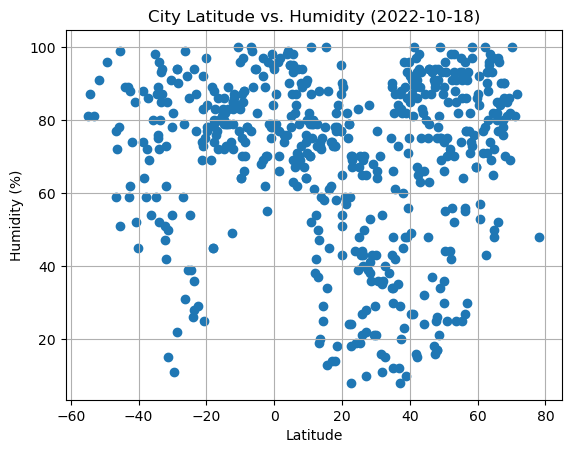

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df ["Lat"], city_data_df ["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

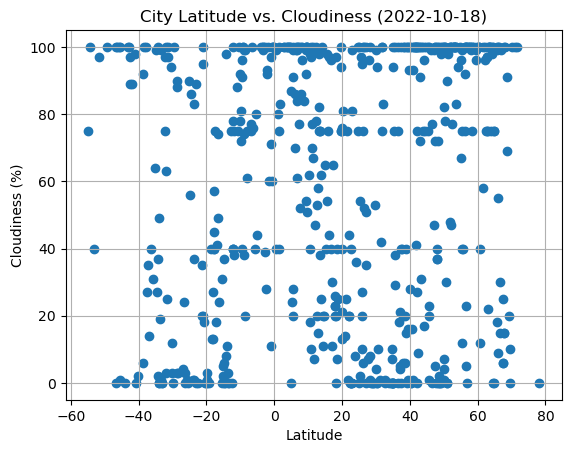

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df ["Lat"], city_data_df ["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

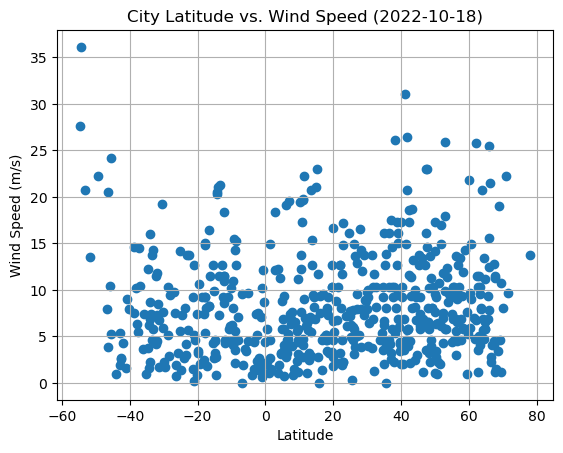

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df ["Lat"], city_data_df ["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plots_function (x_values, y_values, text_coordinates, label_x, label_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    string = f"y={round(slope,2)}x + {round(intercept,2)}"
    linear_regression = slope * x_values + intercept

    print (f"r-value = {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,linear_regression, "r-")
    plt.annotate(string, text_coordinates, color = "red", fontsize = 12)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,myeik,12.4333,98.6000,90.16,54,78,1.05,MM,1682915155
4,yuzhno-kurilsk,44.0306,145.8556,48.74,82,75,2.42,RU,1682915156
7,kailahun,8.2833,-10.5667,70.25,94,96,0.85,SL,1682915157
8,shiyan,32.6475,110.7781,77.90,40,1,8.12,CN,1682915157
9,tiksi,71.6872,128.8694,29.26,87,100,9.71,RU,1682915157


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,34.61,87,100,36.13,GS,1682914584
2,adamstown,-25.0660,-130.1015,77.54,86,90,14.14,PN,1682915155
3,west island,-12.1568,96.8225,84.18,79,40,18.41,CC,1682915156
5,camana,-16.6228,-72.7111,68.23,86,74,8.30,PE,1682915156
6,namibe,-15.1961,12.1522,75.36,83,2,2.66,AO,1682915156


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.8657776736545323


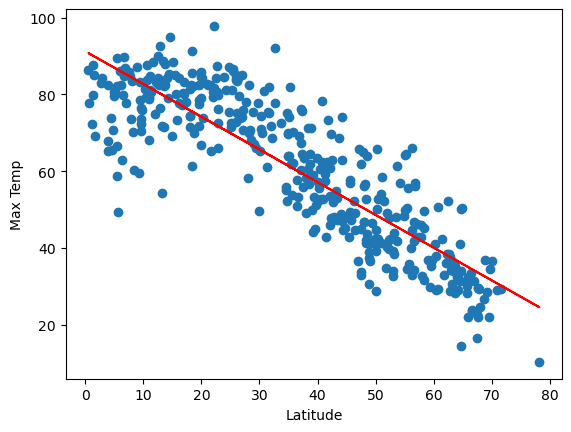

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
linear_regression_plots_function(x_values, y_values, (10,0), "Latitude", "Max Temp")

r-value = 0.7294001884315153


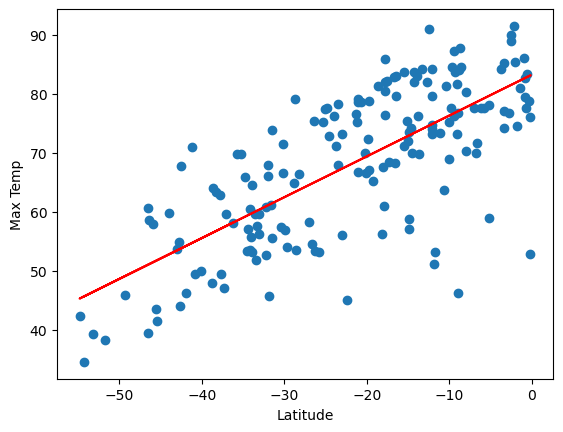

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
linear_regression_plots_function(x_values, y_values, (-50,30), "Latitude", "Max Temp")

**Discussion about the linear relationship:** There is a strong negative correlation between the latitude and tempurature in the northern hemisphere. There is a strong positive correlation between the latitude and tempurature in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.12326066145464105


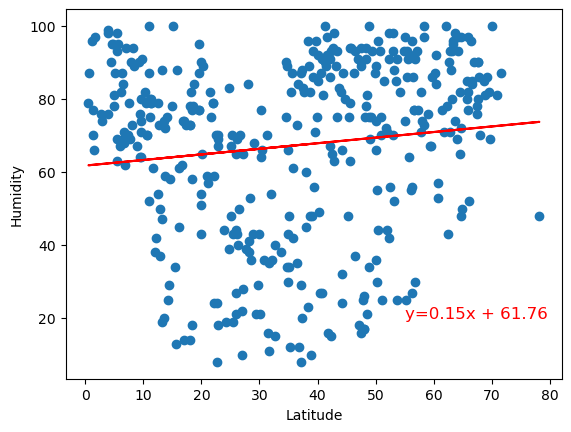

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
linear_regression_plots_function(x_values, y_values, (55,20), "Latitude", "Humidity")

r-value = 0.16878052586503012


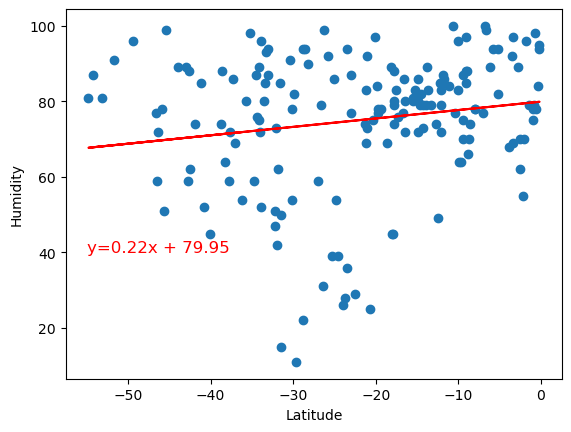

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
linear_regression_plots_function(x_values, y_values, (-55,40), "Latitude", "Humidity")

**Discussion about the linear relationship:** There is a weak correlation between humidity and latitude. The r-value is close two zero, representing a weak correlation between variables in both the northern and southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.040927849779747824


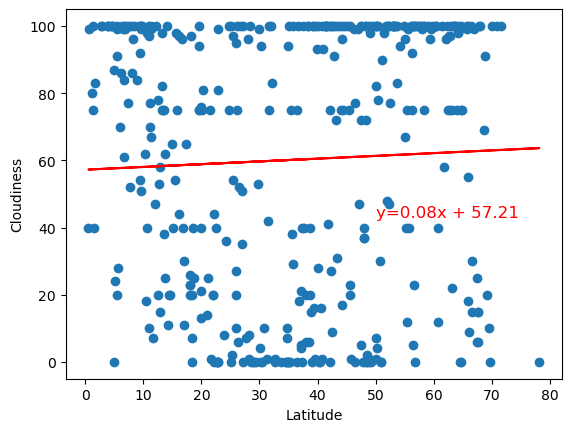

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
linear_regression_plots_function(x_values, y_values, (50,43), "Latitude", "Cloudiness")

r-value = 0.08700393608074226


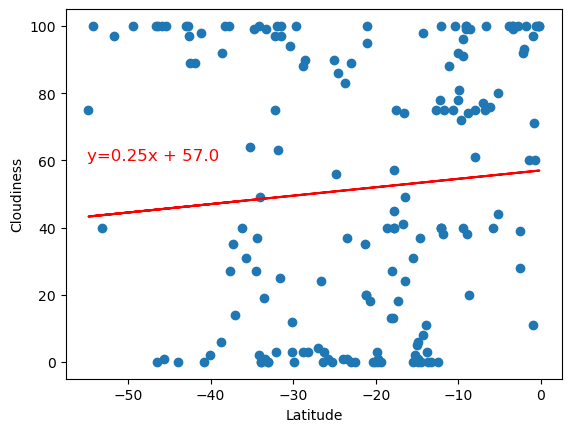

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
linear_regression_plots_function(x_values, y_values, (-55,60), "Latitude", "Cloudiness")

**Discussion about the linear relationship:** The r-value for both the northern and southern hemispheres is very near zero. There does not appear to be a correlation between cloudiness and latitude in the plots presented here. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.1355416034386773


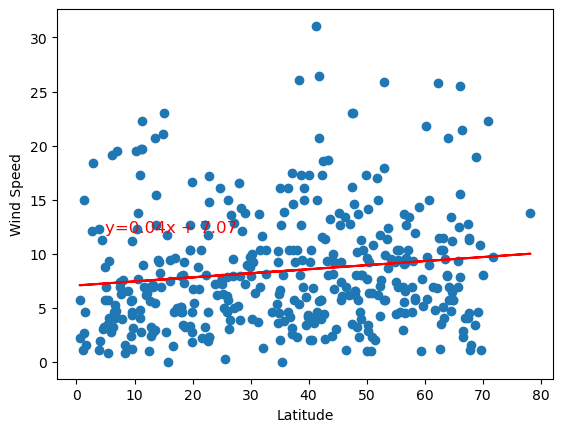

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
linear_regression_plots_function(x_values, y_values, (5,12), "Latitude", "Wind Speed")

r-value = -0.24870796679624035


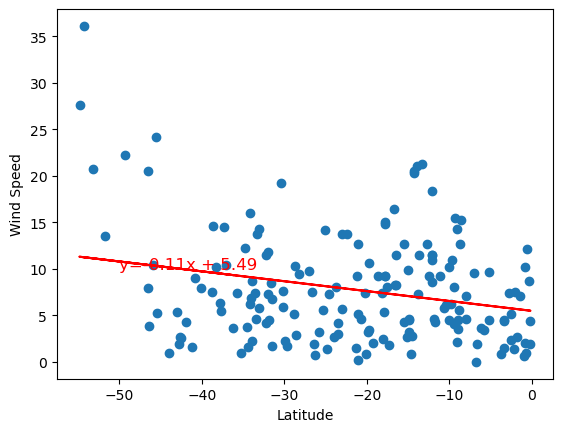

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
linear_regression_plots_function(x_values, y_values, (-50,10), "Latitude", "Wind Speed")

**Discussion about the linear relationship:** The r-value is near zero which represents a very weak correlation between wind speed and latitude in both the northern and southern hemispheres. 